# Daten importieren


In [23]:
import pandas as pd

df = pd.read_csv("scaling_data.csv")
df

,Mitarbeiter,Kunden
0,41,1576
1,16,58
2,73,5080
3,23,588
4,44,2186
5,83,7134
6,76,6046
7,8,19
8,35,1248
9,50,2525


# Daten visualisieren

<Axes: xlabel='Mitarbeiter', ylabel='Kunden'>

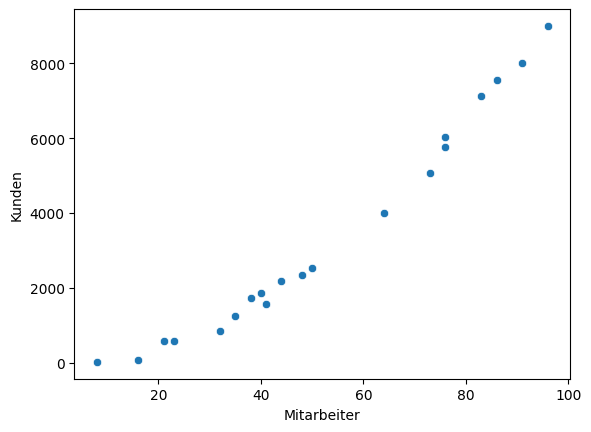

In [25]:
import seaborn as sns

sns.scatterplot(x=df["Mitarbeiter"], y=df["Kunden"])

# Daten aufteilen

In [28]:
X = df[["Mitarbeiter"]]
y = df["Kunden"]

In [29]:
X

,Mitarbeiter
0,41
1,16
2,73
3,23
4,44
5,83
6,76
7,8
8,35
9,50


# Polynomiale Features erstellen

In [53]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly

array([[4.100e+01, 1.681e+03],
       [1.600e+01, 2.560e+02],
       [7.300e+01, 5.329e+03],
       [2.300e+01, 5.290e+02],
       [4.400e+01, 1.936e+03],
       [8.300e+01, 6.889e+03],
       [7.600e+01, 5.776e+03],
       [8.000e+00, 6.400e+01],
       [3.500e+01, 1.225e+03],
       [5.000e+01, 2.500e+03],
       [9.600e+01, 9.216e+03],
       [7.600e+01, 5.776e+03],
       [8.600e+01, 7.396e+03],
       [4.800e+01, 2.304e+03],
       [6.400e+01, 4.096e+03],
       [3.200e+01, 1.024e+03],
       [9.100e+01, 8.281e+03],
       [2.100e+01, 4.410e+02],
       [3.800e+01, 1.444e+03],
       [4.000e+01, 1.600e+03]])

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

In [34]:
X_train

array([[9.600e+01, 9.216e+03],
       [2.100e+01, 4.410e+02],
       [7.600e+01, 5.776e+03],
       [4.800e+01, 2.304e+03],
       [4.400e+01, 1.936e+03],
       [7.300e+01, 5.329e+03],
       [8.300e+01, 6.889e+03],
       [6.400e+01, 4.096e+03],
       [5.000e+01, 2.500e+03],
       [8.000e+00, 6.400e+01],
       [9.100e+01, 8.281e+03],
       [7.600e+01, 5.776e+03],
       [2.300e+01, 5.290e+02],
       [4.100e+01, 1.681e+03],
       [3.200e+01, 1.024e+03],
       [8.600e+01, 7.396e+03]])

In [35]:
y_train

10    9004
17     591
6     6046
13    2355
4     2186
2     5080
5     7134
14    4007
9     2525
7       19
16    8012
11    5778
3      588
0     1576
15     845
12    7550
Name: Kunden, dtype: int64

# Modell trainieren

In [36]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Modell visualisieren

Text(0.5, 0, 'Mitarbeiter')

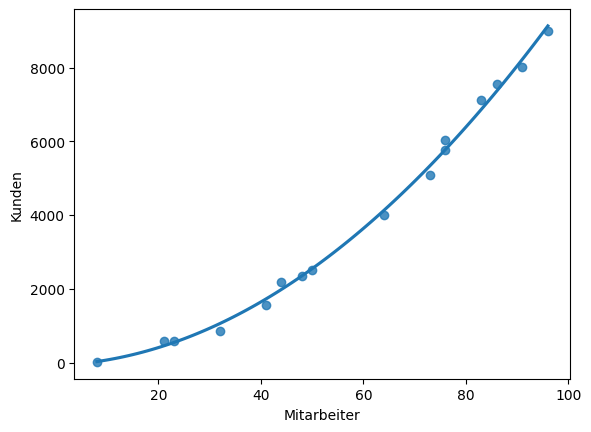

In [39]:
import matplotlib.pyplot as plt

sns.regplot(x=X_train[:, 0], y=y_train, order=2, ci=None)
plt.xlabel("Mitarbeiter")

# Vorhersage

In [43]:
X_test

array([[  38., 1444.],
       [  16.,  256.],
       [  40., 1600.],
       [  35., 1225.]])

In [44]:
y_predict = model.predict(X_test)
y_predict

array([1488.19564777,  251.51267287, 1645.94625905, 1265.73375782])

# Modellbewertung (Mean Absolute Error)

In [45]:
y_test

18    1736
1       58
19    1864
8     1248
Name: Kunden, dtype: int64

In [46]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_predict, y_test)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 169.2761309665675


# Modellparameter

In [50]:
m_1, m_2 = model.coef_
c = model.intercept_

print(f"m1: {m_1}, m2: {m_2}, c: {c}")

m1: 5.222365421715928, m2: 0.9442684643297505, c: -73.77790074310542


In [51]:
print("Vorhersage für 38 Mitarbeiter: ", m_1 * 38 + m_2 * 1444 + c)

Vorhersage für 38 Mitarbeiter:  1488.1956477742597
